## 0) Preliminaries

In [1]:
library(ape)
library(ggtree)
library(phangorn)
library(Quartet)
library(adephylo)
library(dplyr)
library(ggplot2)
library(ggnewscale)

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628




Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate


Loading requir

## 1) Reading trees

In [2]:
ref_tree <- read.tree("../config/esche_shige.tree")
rankc_tree <- read.tree("rankc_nj_tree_1.nwk")
#rankindl_tree <- read.tree("rankindl_nj_tree_1.nwk")
#dcj_tree <- read.tree("dcj_nj_tree_1.nwk")

## 2) Topological comparison of trees

### 2.1) Rankc vs. Reference

In [24]:
RF.dist(rankc_tree, ref_tree, normalize = TRUE)
splitStatuses <- SplitStatus(rankc_tree, ref_tree) # RF = d1 + d2
SymmetricDifference(SplitStatus(rankc_tree, ref_tree)) # similarity by splits, aka RF

quartetStatuses <- QuartetStatus(rankc_tree, ref_tree)
SymmetricDifference(quartetStatuses) # similarity by quartets

[1] 0.5294118

[1] 0.4705882

[1] 0.6569659

### 2.2) Rank-Indel vs. Reference

In [4]:
RF.dist(rankindl_tree, ref_tree)
SplitStatus(rankindl_tree, ref_tree) # RF = d1 + d2
SymmetricDifference(SplitStatus(rankindl_tree, ref_tree)) # similarity by splits, aka RF
QuartetStatus(rankindl_tree, ref_tree)
SymmetricDifference(QuartetStatus(rankindl_tree, ref_tree)) # similarity by quartets

[1] 16

N,P1,P2,s,d1,d2,r1,r2
34,17,17,9,8,8,0,0


[1] 0.5294118

N,Q,s,d,r1,r2,u
9690,4845,3670,1175,0,0,0


[1] 0.7574819

### 2.3) DCJ vs. Reference

In [6]:
RF.dist(dcj_tree, ref_tree)
SplitStatus(dcj_tree, ref_tree) # RF = d1 + d2
SymmetricDifference(SplitStatus(dcj_tree, ref_tree)) # similarity by splits, aka RF
QuartetStatus(dcj_tree, ref_tree)
SymmetricDifference(QuartetStatus(dcj_tree, ref_tree)) # similarity by quartets

ERROR: Error in RF.dist(dcj_tree, ref_tree): object 'dcj_tree' not found


## 3) Plotting

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



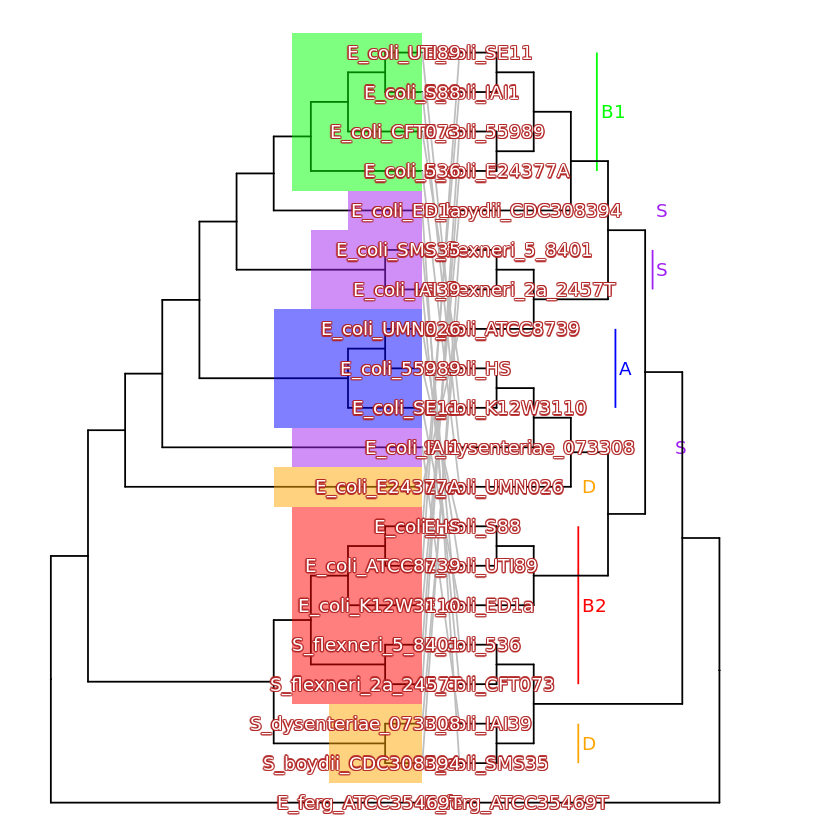

In [6]:
pref <- ggtree(ref_tree, branch.length = "none") +
    geom_tiplab() + 
    geom_hilight(node=37, fill="green") +
    geom_cladelabel(node=37, label="B1", color="green", align=TRUE, offset=4.5) +
    geom_hilight(node=32, fill="blue") +
    geom_cladelabel(node=32, label="A", color="blue", align=TRUE, offset=5) +
    geom_hilight(node=25, fill="red") +
    geom_cladelabel(node=25, label="B2", color="red", align=TRUE, offset=4) +
    geom_hilight(node=24, fill="orange") +
    geom_cladelabel(node=24, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=9, fill="orange") +
    geom_cladelabel(node=9, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=35, fill="purple") +
    geom_cladelabel(node=35, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=16, fill="purple") +
    geom_cladelabel(node=16, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=10, fill="purple") +
    geom_cladelabel(node=10, label="S", color="purple", align=TRUE, offset=6.5) +
    xlim(0, 20)

rank_tree_nobranch <- read.tree("rank_nj_tree_1.nwk.nobranch")
prank <- ggtree(rank_tree_nobranch)

d1 <- pref$data
d2 <- prank$data

d2$x <- max(d2$x) - d2$x + max(d1$x) + 1

pp <- pref + geom_tree(data = d2) +
    ggnewscale::new_scale_fill() +
    geom_tiplab() +
    #geom_hilight(node=25, fill="green") +
    #geom_cladelabel(node=25, label="B1", color="green", align=TRUE, offset=4.5) +
    #geom_hilight(node=28, fill="blue") +
    #geom_cladelabel(node=28, label="A", color="blue", align=TRUE, offset=5) +
    #geom_hilight(node=31, fill="orange") +
    #geom_cladelabel(node=31, label="D", color="orange", align=TRUE, offset=4.5) +
    #geom_hilight(node=33, fill="red") +
    #geom_cladelabel(node=33, label="B2", color="red", align=TRUE, offset=4) +
    #geom_hilight(node=37, fill="purple") +
    #geom_cladelabel(node=37, label="S", color="purple", align=TRUE, offset=6.5) +
    xlim(0, 20)

dd <- bind_rows(d1, d2) %>%
    filter(!is.na(label))
pp + geom_line(aes(x, y, group=label), data=dd, color='grey') +
    geom_tiplab(geom = 'shadowtext', bg.colour = alpha('firebrick', .5)) +
    geom_tiplab(data = d2, hjust=1, geom = 'shadowtext', bg.colour = alpha('firebrick', .5))

### 3.1) Reference

In [7]:
png("reference_tree.png")
plot <- ggtree(ref_tree, branch.length = "none") +
    geom_tiplab() + 
    geom_hilight(node=37, fill="green") +
    geom_cladelabel(node=37, label="B1", color="green", align=TRUE, offset=4.5) +
    geom_hilight(node=32, fill="blue") +
    geom_cladelabel(node=32, label="A", color="blue", align=TRUE, offset=5) +
    geom_hilight(node=25, fill="red") +
    geom_cladelabel(node=25, label="B2", color="red", align=TRUE, offset=4) +
    geom_hilight(node=24, fill="orange") +
    geom_cladelabel(node=24, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=9, fill="orange") +
    geom_cladelabel(node=9, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=35, fill="purple") +
    geom_cladelabel(node=35, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=16, fill="purple") +
    geom_cladelabel(node=16, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=10, fill="purple") +
    geom_cladelabel(node=10, label="S", color="purple", align=TRUE, offset=6.5) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2

### 3.2) Rankc

I removed the branch lenghts so that the plot works. Don't know why it breaks with branch lengths, even though I pass `branch.length="none"`.
```bash
cat rankc_nj_tree_1.nwk | sed 's/\:[0-9]*[\.[0-9]*]*//g' > rankc_nj_tree_1.nwk.nobranch
```

In [18]:
rankc_tree_nobranch <- read.tree("rankc_nj_tree_1.nwk.nobranch")

png("rankc_tree.png")
plot <- ggtree(rankc_tree_nobranch) +
    geom_tiplab() +
    geom_hilight(node=26, fill="green") +
    geom_cladelabel(node=26, label="B1", color="green", align=TRUE, offset=4.5) +
    geom_hilight(node=29, fill="blue") +
    geom_cladelabel(node=29, label="A", color="blue", align=TRUE, offset=5) +
    geom_hilight(node=31, fill="orange") +
    geom_cladelabel(node=31, label="D", color="orange", align=TRUE, offset=4.5) +
    geom_hilight(node=33, fill="red") +
    geom_cladelabel(node=33, label="B2", color="red", align=TRUE, offset=4) +
    geom_hilight(node=37, fill="purple") +
    geom_cladelabel(node=37, label="S", color="purple", align=TRUE, offset=6.5) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2

### 3.2) Rank

I removed the branch lenghts so that the plot works. Don't know why it breaks with branch lengths, even though I pass `branch.length="none"`.
```bash
cat rank_nj_tree_1.nwk | sed 's/\:[0-9]*[\.[0-9]*]*//g' > rank_nj_tree_1.nwk.nobranch
```

In [6]:
rankc_tree_nobranch <- read.tree("rank_nj_tree_1.nwk.nobranch")

png("rank_tree.png")
plot <- ggtree(rank_tree_nobranch) +
    geom_tiplab() +
    geom_hilight(node=25, fill="green") +
    geom_cladelabel(node=25, label="B1", color="green", align=TRUE, offset=4.5) +
    geom_hilight(node=28, fill="blue") +
    geom_cladelabel(node=28, label="A", color="blue", align=TRUE, offset=5) +
    geom_hilight(node=31, fill="orange") +
    geom_cladelabel(node=31, label="D", color="orange", align=TRUE, offset=4.5) +
    geom_hilight(node=33, fill="red") +
    geom_cladelabel(node=33, label="B2", color="red", align=TRUE, offset=4) +
    geom_hilight(node=37, fill="purple") +
    geom_cladelabel(node=37, label="S", color="purple", align=TRUE, offset=6.5) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2

### 3.2) DCJ-indel

I removed the branch lenghts so that the plot works. Don't know why it breaks with branch lengths, even though I pass `branch.length="none"`.
```bash
cat dcj_nj_tree_1.nwk | sed 's/\:[0-9]*[\.[0-9]*]*//g' > dcj_nj_tree_1.nwk.nobranch
```

In [14]:
dcj_tree_nobranch <- read.tree("dcj_nj_tree_1.nwk.nobranch")

png("dcj_tree.png")
plot <- ggtree(dcj_tree_nobranch) +
    geom_tiplab() +
    geom_hilight(node=31, fill="green") +
    geom_cladelabel(node=31, label="B1", color="green", align=TRUE, offset=4.5) +
    geom_hilight(node=29, fill="blue") +
    geom_cladelabel(node=29, label="A", color="blue", align=TRUE, offset=5) +
    geom_hilight(node=34, fill="orange") +
    geom_cladelabel(node=34, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=1, fill="orange") +
    geom_cladelabel(node=1, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=35, fill="red") +
    geom_cladelabel(node=35, label="B2", color="red", align=TRUE, offset=4) +
    geom_hilight(node=39, fill="purple") +
    geom_cladelabel(node=39, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=16, fill="purple") +
    geom_cladelabel(node=16, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=19, fill="purple") +
    geom_cladelabel(node=19, label="S", color="purple", align=TRUE, offset=6) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2